best x: [0.3 0.4], best objective: 1.5213305816703653e-29


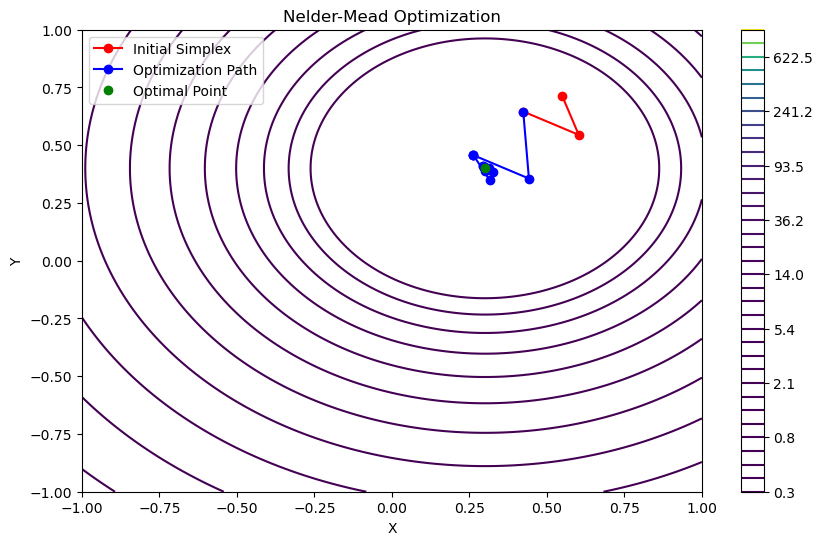

In [120]:
import numpy as np
import matplotlib.pyplot as plt

"""
step2
各頂点の評価
各頂点における関数値を計算し, 評価する（頂点での値によって並べ替える）. 𝐟(𝐱_𝟏)≤𝐟(𝐱_𝟐)≤⋯≤𝐟(𝐱_(𝒏+𝟏))
"""
def objective(x, y):
    return (x-0.3)**2+(y-0.4)**2

def evaluate(x):
    idx=np.zeros(x.shape[0])
    f=np.zeros(x.shape[0])
    for k in range(x.shape[0]):
        idx[k]=k
        f[k] = objective(x[k,0],x[k,1])
        if k>=1:
            l=k
            tmpf=f[k]
            tmpidx=idx[k]
            while l>0 and tmpf<f[l-1]:
                f[l]=f[l-1]
                idx[l]=idx[l-1]
                l=l-1
            f[l]=tmpf
            idx[l]=tmpidx
    return idx

"""
step1
初期シンプレックスの構築
n次元の問題に対して, n+1個の頂点から成るシンプレックスを初期化する. 各頂点は評価する点を表し, その値が目的関数fによって計算される. 
"""
alpha = 1
gamma = 2
rho = 0.5
sigma = 0.5
n_iter=100
rank = 2

np.random.seed(0)
initial_x = np.random.rand(rank+1, rank) #2次元の場合3行2列
x = np.copy(initial_x)
idx=np.zeros(x.shape[0])
optimal_x=np.zeros((n_iter, 2))
for i in range(n_iter):
    idx=evaluate(x)
    tmp = np.zeros((rank+1, rank))
    for k in range(x.shape[0]):
        tmp[k]= x[int(idx[k]),:]
    x = np.copy(tmp)
    #重心（x_n+1は除外）
    centroid = x[0:rank,:].mean(axis=0) 
    
    """
    step3
    反射, 拡張, 収縮, 縮小
    """
    
    #反射：最も高い評価値を持つ頂点を反射させ, 新しい頂点を生成する
    x_r = centroid+alpha*(centroid-x[-1,:])
    if objective(x[0,0],x[0,1])<= objective(x_r[0],x_r[1]) and objective(x_r[0],x_r[1])<objective(x[-2,0],x[-2,1]):
        x[-1,:]=x_r
    #拡張：反射点が良好である場合, さらにその方向にシンプレックスを拡張する. 
    elif objective(x_r[0],x_r[1])<objective(x[0,0],x[0,1]):
        x_e = centroid+gamma*(x_r-centroid)
        if objective(x_e[0],x_e[1])<objective(x_r[0],x_r[1]):
            x[-1,:]=x_e
        else :
            x[-1,:]=x_r
    #収縮：反射点が悪い場合, シンプレックスを収縮させる. 
    elif objective(x[-2,0],x[-2,1])<=objective(x_r[0],x_r[1]) and objective(x_r[0],x_r[1])<objective(x[-1,0],x[-1,1]):
        x_c = centroid+rho*(x_r-centroid)
        if objective(x_c[0],x_c[1])<objective(x_r[0],x_r[1]):
            x[-1,:]=x_c
        else :
            #縮小：収縮も失敗した場合, シンプレックス全体を縮小させる
            for t in range(1,x.shape[0]):
                x[t,:]=x[0,:]+sigma*(x[t,:]-x[0,:])
    elif objective(x[-1,0],x[-1,1])<=objective(x_r[0],x_r[1]):
        x_c = centroid+rho*(x[-1,:]-centroid)
        if objective(x_c[0],x_c[1])<objective(x[-1,0],x[-1,1]):
            x[-1,:]=x_c
        else :
            for t in range(1,x.shape[0]):
                x[t,:]=x[0,:]+sigma*(x[t,:]-x[0,:])
    
    optimal_x[i] = x[0] #np.append(optimal_x, x[0], axis=0)
    #print(optimal_x)

    """
    step4
    収束条件
    シンプレックスの頂点間の距離が十分小さくなるか, 評価値の差が十分に小さくなった場合, 最適化を終了する. 
    """

data_x= np.linspace(-1, 1, 200)
data_y= np.linspace(-1, 1, 200)   
X, Y = np.meshgrid(data_x, data_y)
Z = objective(X, Y)
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3, 35), cmap='viridis') #等高線

# 初期単純形の描画
plt.plot(*zip(*initial_x), 'ro-', label='Initial Simplex')

# 最適化の経過の描画
plt.plot(optimal_x[:, 0], optimal_x[:, 1], 'bo-', label='Optimization Path')

# 最適な点の描画
plt.plot(optimal_x[-1, 0], optimal_x[-1, 1], 'go', label='Optimal Point')
print("best x: {}, best objective: {}".format(optimal_x[-1], objective(optimal_x[-1, 0], optimal_x[-1, 1])))

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nelder-Mead Optimization')
plt.legend()
plt.colorbar()
plt.show()

In [99]:
import numpy as np
p =np.random.rand(3,2)
index=np.zeros(p.shape[0])
f=np.zeros(p.shape[0])
for k in range(p.shape[0]):
        index[k]=k
        f[k] = (p[k,0]-0.3)**2+(p[k,1]-0.4)**2
        print(index[k],f[k])
        if k>=1:
            l=k
            tmpf=f[k]
            tmpidx=index[k]
            while l>0 and tmpf<f[l-1]:
                f[l]=f[l-1]
                index[l]=index[l-1]
                l=l-1
            f[l]=tmpf
            index[l]=tmpidx
            
print(index,f)
tmp = np.zeros((3,2))
for k in range(p.shape[0]):
    tmp[k]= p[int(index[k]),:]
print(tmp)
print(p)
p = np.copy(tmp)
print(p)

0.0 0.08550020956133195
1.0 0.09341392455428262
2.0 0.08834066752362897
[0. 2. 1.] [0.08550021 0.08834067 0.09341392]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [71]:
centroid = p[0:2,:].mean(axis=0)
print(p, centroid, p.mean(axis=0))
t=3
tmp =np.zeros(t+1)
print(tmp)


[[0.40549603 0.40267464]
 [0.2669808  0.21276451]
 [0.31180319 0.79272301]] [0.33623842 0.30771957] [0.32809334 0.46938738]
[0. 0. 0. 0.]


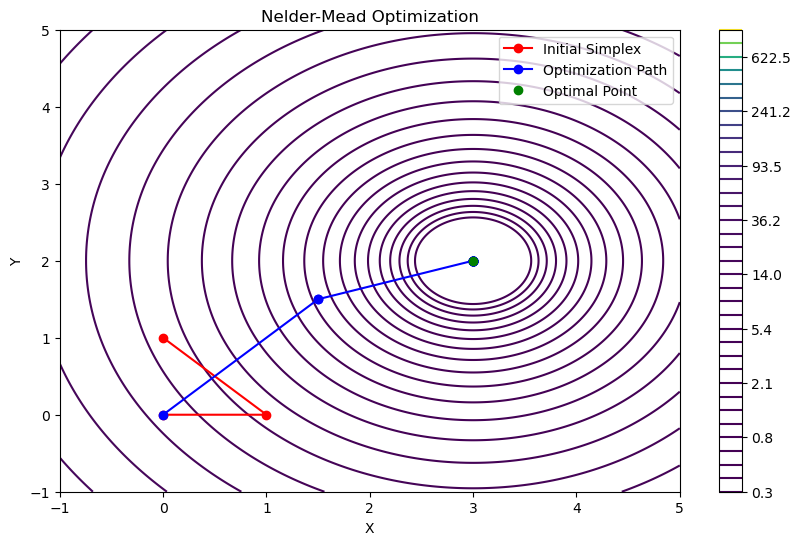

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 目的関数の定義
def objective_function(params):
    x, y = params
    return (x - 3)**2 + (y - 2)**2

# 初期単純形の設定
initial_simplex = [
    [0, 0],  # P_0
    [1, 0],  # P_1
    [0, 1]   # P_2
]

# 最適化の実行
result = minimize(objective_function, initial_simplex[0], method='Nelder-Mead', options={'initial_simplex': initial_simplex, 'return_all': True})
optimal_point = result.x
all_points = np.array(result.allvecs)

# グラフの設定
x = np.linspace(-1, 5, 400)
y = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x, y)
Z = objective_function([X, Y])

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3, 35), cmap='viridis')

# 初期単純形の描画
plt.plot(*zip(*initial_simplex), 'ro-', label='Initial Simplex')

# 最適化の経過の描画
plt.plot(all_points[:, 0], all_points[:, 1], 'bo-', label='Optimization Path')

# 最適な点の描画
plt.plot(optimal_point[0], optimal_point[1], 'go', label='Optimal Point')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nelder-Mead Optimization')
plt.legend()
plt.colorbar()
plt.show()
